In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data_cross = pd.read_csv('C:\\Users\\00000\\oasis_cross-sectional.csv')
data_cross.head()

ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [3]:
data_long = pd.read_csv('C:\\Users\\00000\\oasis_longitudinal.csv')
data_long.head()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034

In [4]:
data_long = data_long.rename(columns={'EDUC':'Educ'})

In [5]:
data = pd.concat([data_cross, data_long])
data.head()

ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay Subject ID MRI ID Group  Visit  MR Delay  
0    NaN        NaN    NaN   NaN    NaN       NaN  
1    NaN        NaN    NaN   NaN    NaN       NaN  
2    NaN        NaN    NaN   NaN    NaN       NaN  
3    NaN        NaN    NaN   NaN    NaN       NaN  
4    NaN        NaN    NaN   NaN    NaN       NaN

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
data.shape

(809, 17)

In [8]:
data.dtypes

ID             object
M/F            object
Hand           object
Age             int64
Educ          float64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
Delay         float64
Subject ID     object
MRI ID         object
Group          object
Visit         float64
MR Delay      float64
dtype: object

In [9]:
data.describe()

Age        Educ        SES        MMSE         CDR         eTIV  \
count  809.000000  608.000000  570.00000  606.000000  608.000000   809.000000   
mean    63.186650   10.184211    2.47193   27.234323    0.288651  1484.782447   
std     23.117511    6.058388    1.12805    3.687980    0.377697   166.911689   
min     18.000000    1.000000    1.00000    4.000000    0.000000  1106.000000   
25%     49.000000    4.000000    2.00000   26.000000    0.000000  1361.000000   
50%     72.000000   12.000000    2.00000   29.000000    0.000000  1475.000000   
75%     80.000000   16.000000    3.00000   30.000000    0.500000  1583.000000   
max     98.000000   23.000000    5.00000   30.000000    2.000000  2004.000000   

             nWBV         ASF     Delay       Visit     MR Delay  
count  809.000000  809.000000  20.00000  373.000000   373.000000  
mean     0.763037    1.197311  20.55000    1.882038   595.104558  
std      0.059401    0.133031  23.86249    0.922843   635.485118  
min      0.644000    0.876000   1.00000    1.000000     0.000000  
25%      0.715000    1.108000   2.75000    1.000000     0.000000  
50%      0.754000    1.190000  11.00000    2.000000   552.000000  
75%      0.817000    1.290000  30.75000    2.000000   873.000000  
max      0.893000    1.587000  89.00000    5.000000  2639.000000

In [10]:
data.isnull().sum()

ID            373
M/F             0
Hand            0
Age             0
Educ          201
SES           239
MMSE          203
CDR           201
eTIV            0
nWBV            0
ASF             0
Delay         789
Subject ID    436
MRI ID        436
Group         436
Visit         436
MR Delay      436
dtype: int64

In [11]:
for column in data.columns:
    mode_value = data[column].mode()[0]  
    data[column].fillna(mode_value, inplace=True)

missing_values_after_filling = data.isnull().sum()
print(missing_values_after_filling)

ID            0
M/F           0
Hand          0
Age           0
Educ          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
Delay         0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
dtype: int64


In [12]:
data.head()

ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28  12.0  2.0  30.0  0.0  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18  12.0  2.0  30.0  0.0  1737  0.848  1.010   

   Delay Subject ID         MRI ID        Group  Visit  MR Delay  
0    2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
1    2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
2    2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
3    2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
4    2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Educ'}>,
        <Axes: title={'center': 'SES'}>],
       [<Axes: title={'center': 'MMSE'}>,
        <Axes: title={'center': 'CDR'}>,
        <Axes: title={'center': 'eTIV'}>],
       [<Axes: title={'center': 'nWBV'}>,
        <Axes: title={'center': 'ASF'}>,
        <Axes: title={'center': 'Delay'}>],
       [<Axes: title={'center': 'Visit'}>,
        <Axes: title={'center': 'MR Delay'}>, <Axes: >]], dtype=object)

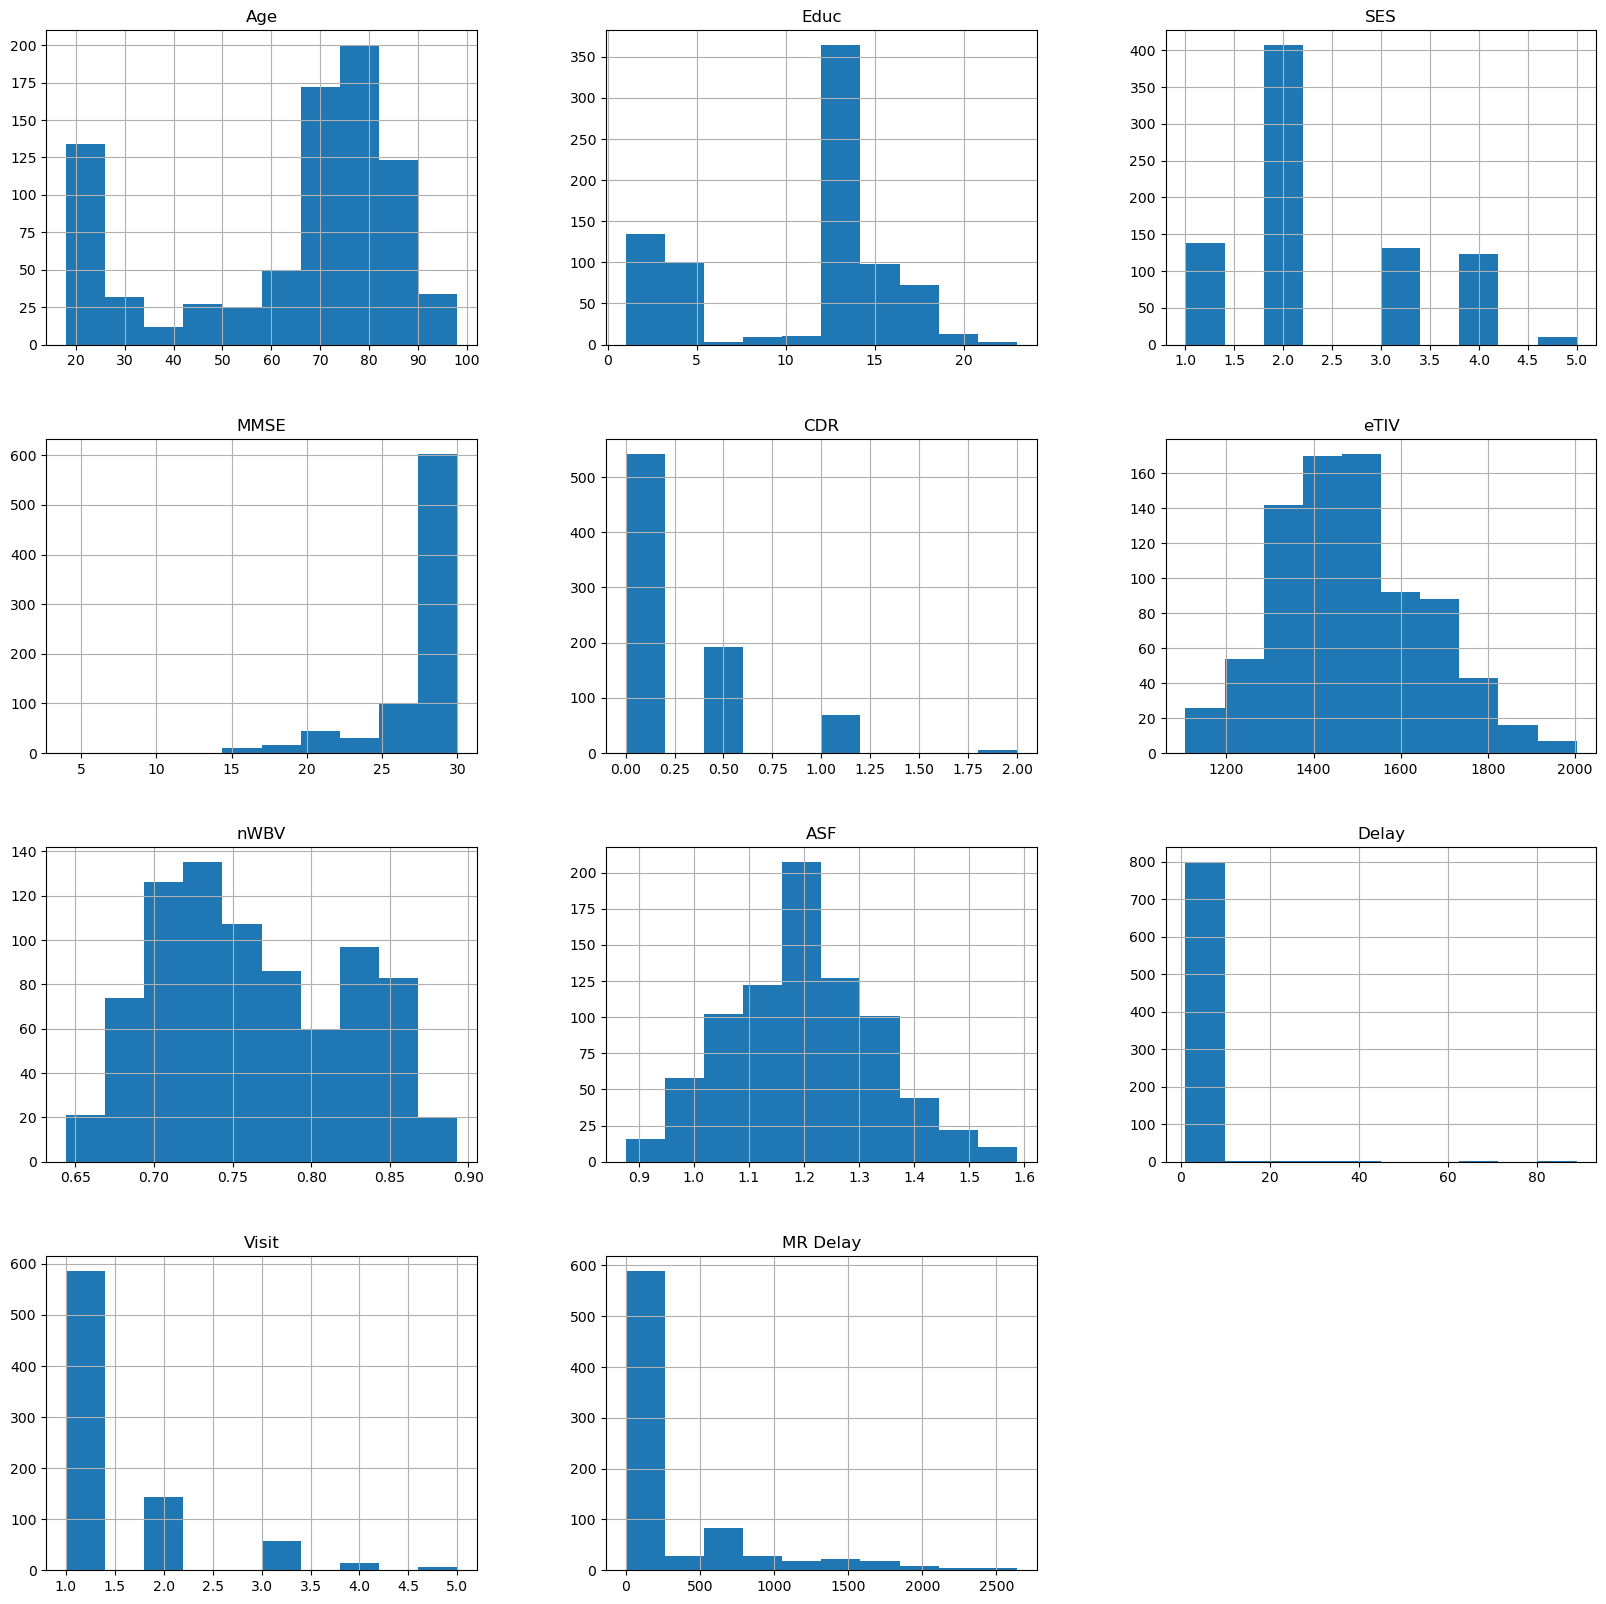

In [13]:
data.hist(figsize = (20,20))

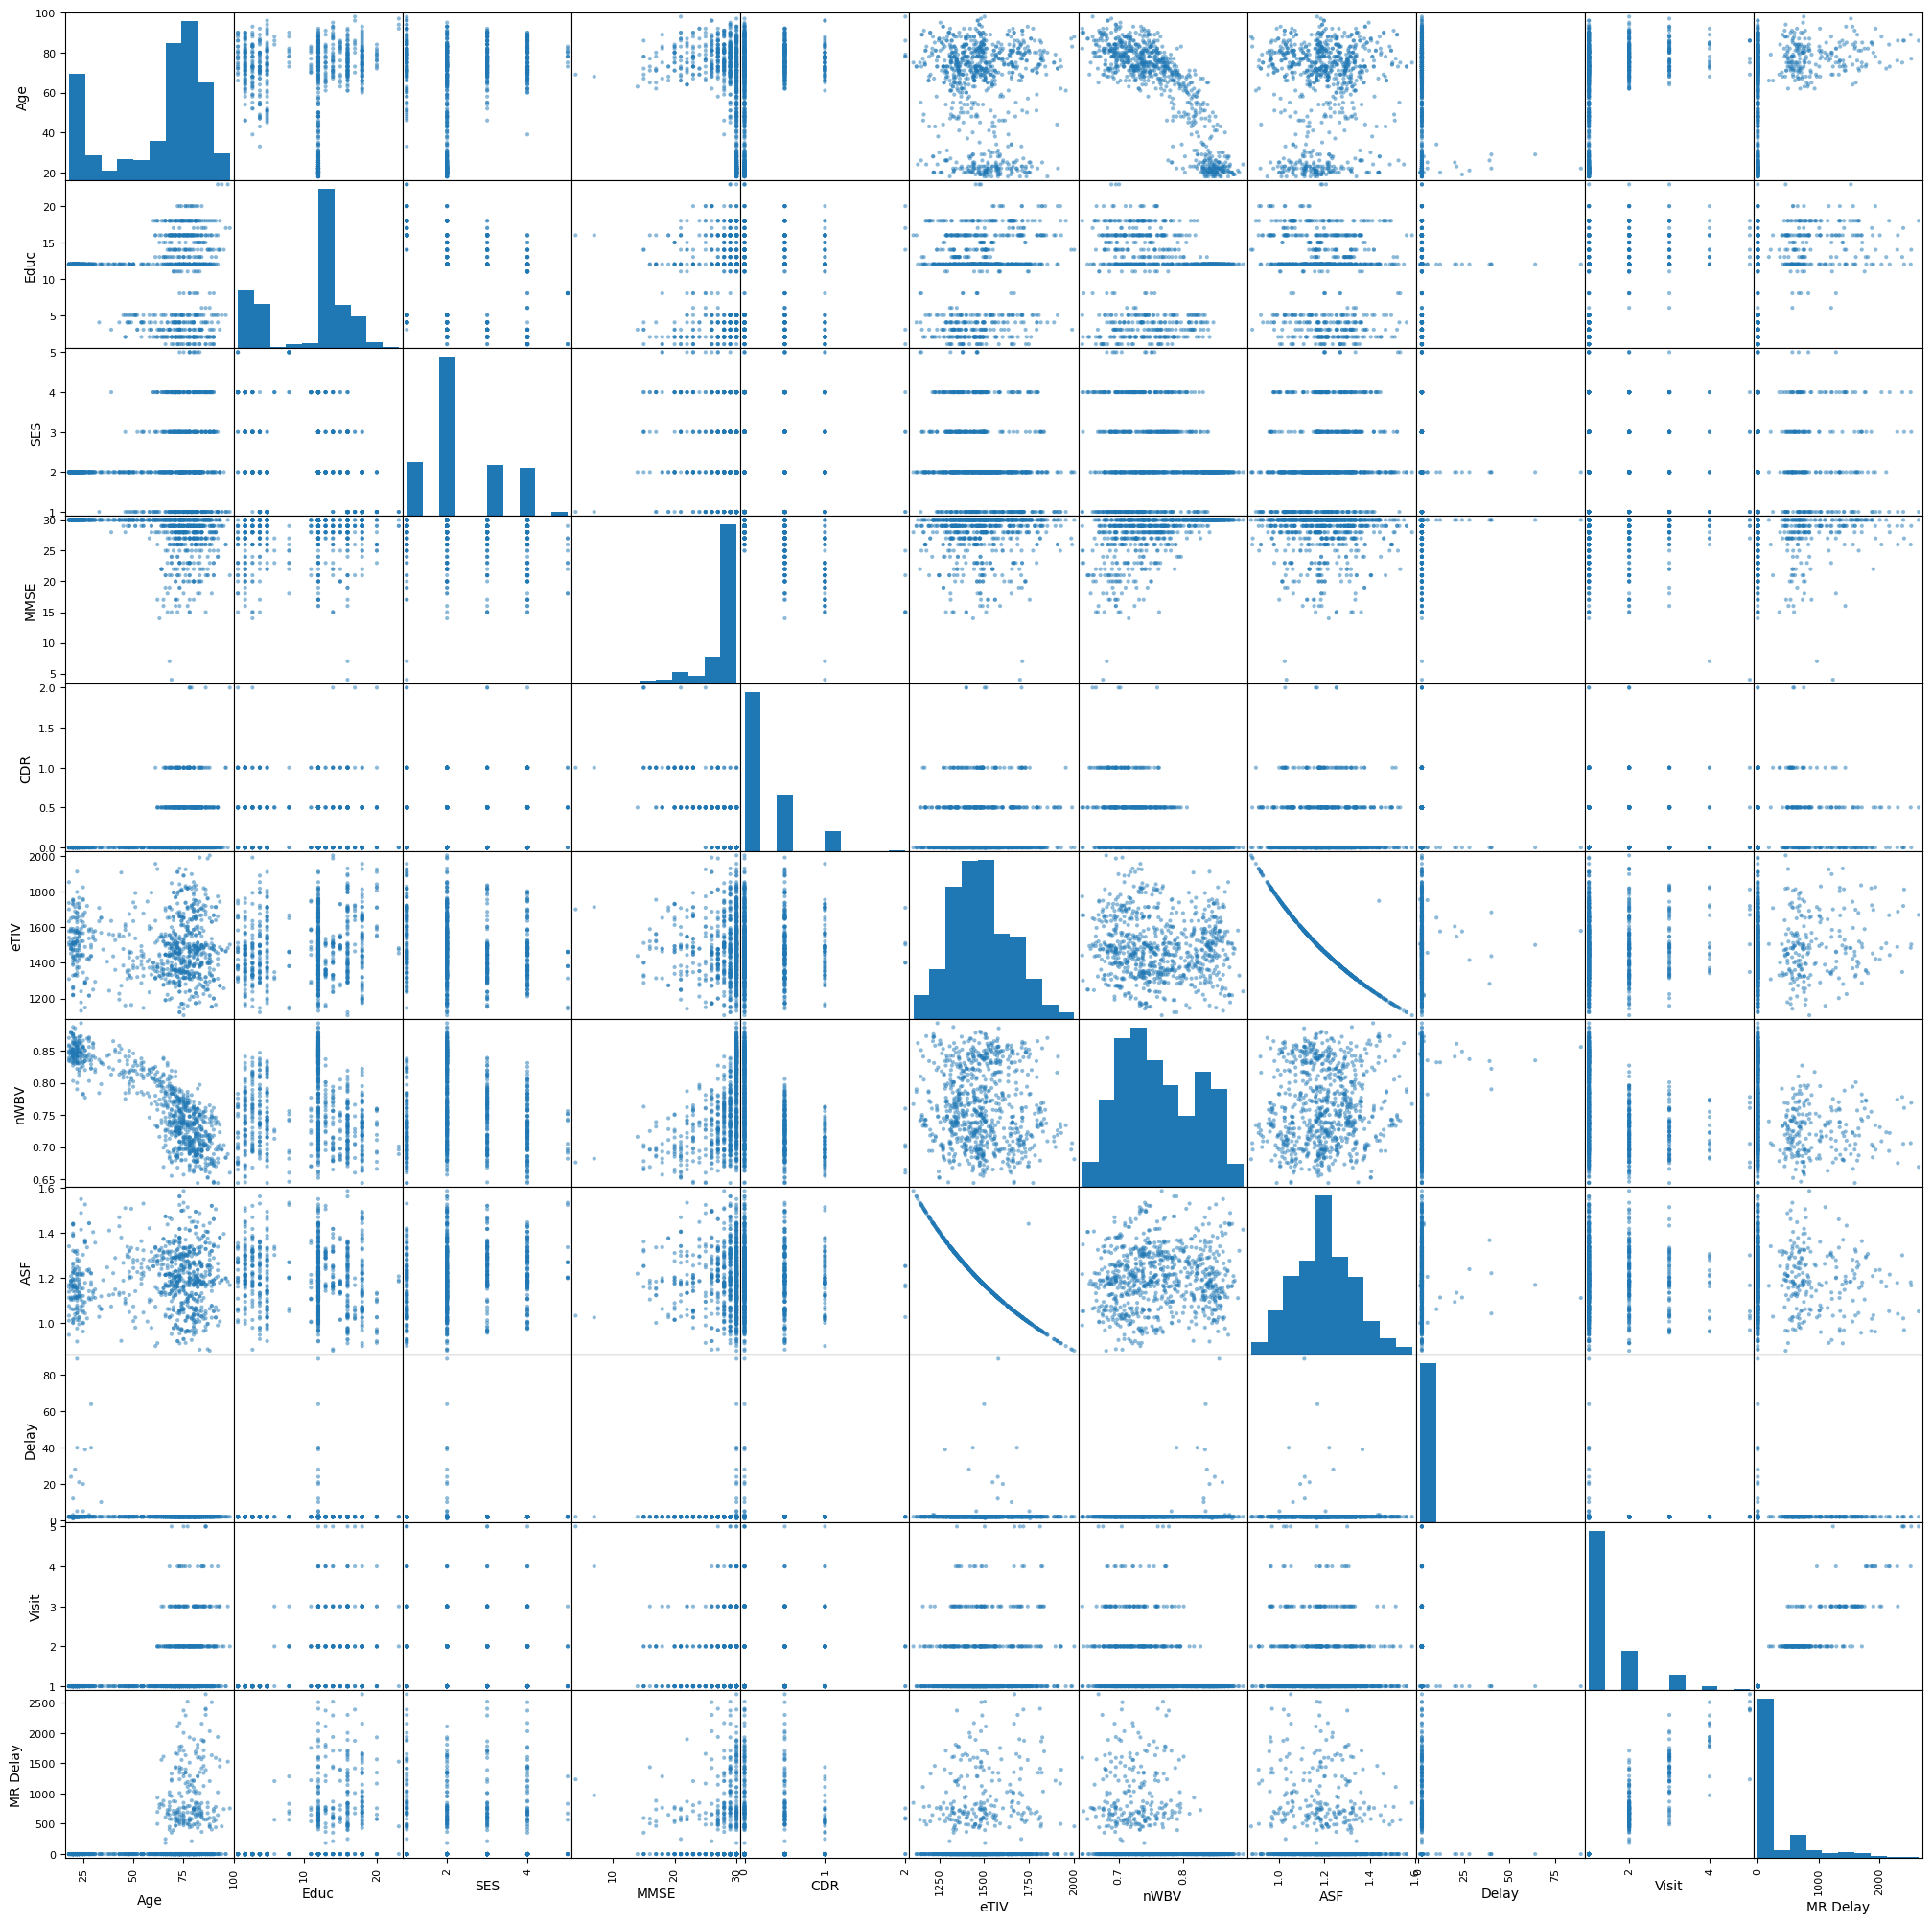

In [14]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(25, 25))

(15.3, 30.0)

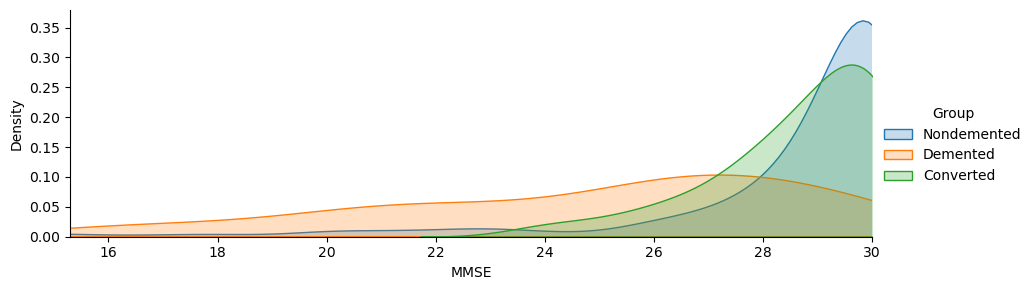

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, data['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

(0.6, 0.9)

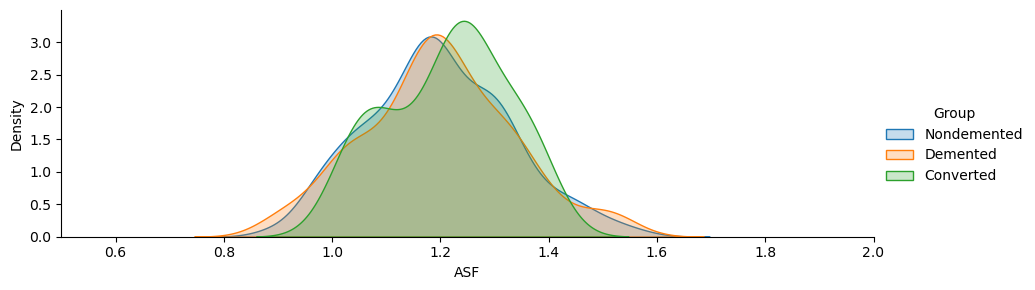

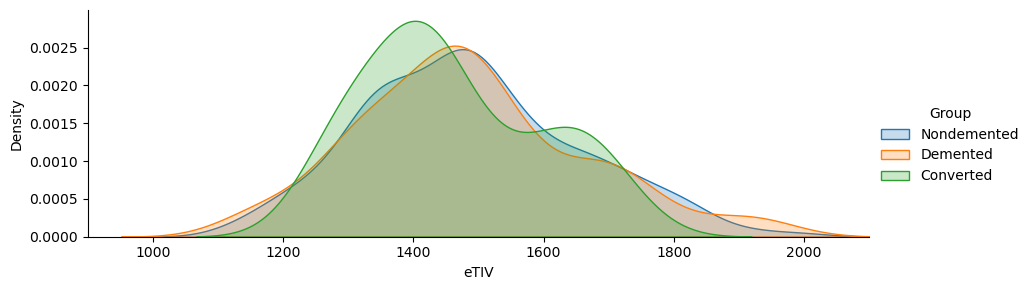

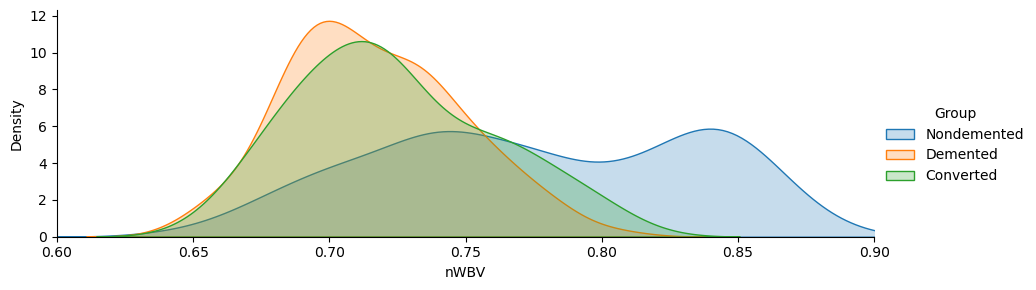

In [16]:
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, data['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, data['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)


facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, data['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

(50.0, 100.0)

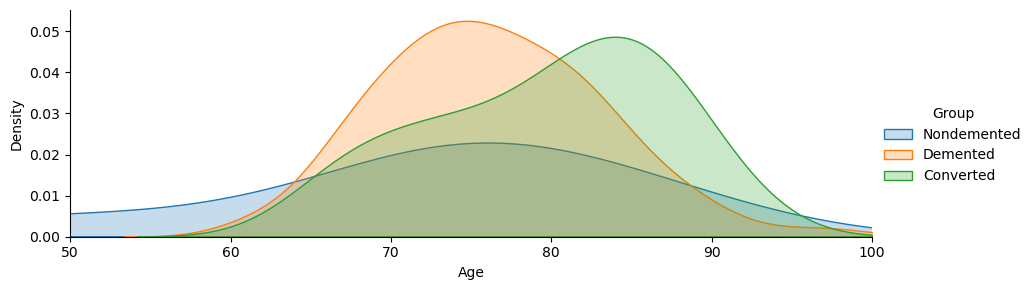

In [17]:
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

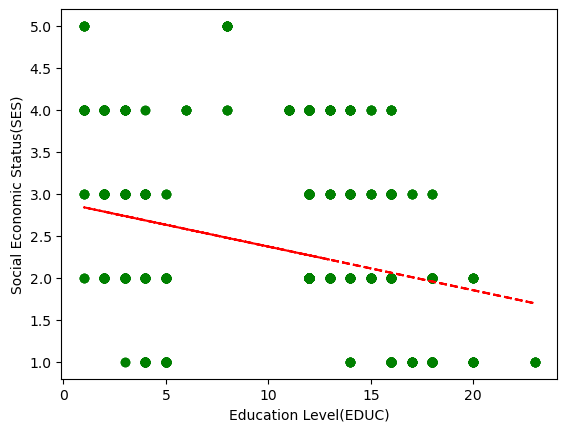

In [18]:
x = data['Educ']
y = data['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score

In [20]:
data.head()

ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28  12.0  2.0  30.0  0.0  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18  12.0  2.0  30.0  0.0  1737  0.848  1.010   

   Delay Subject ID         MRI ID        Group  Visit  MR Delay  
0    2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
1    2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
2    2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
3    2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
4    2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0

In [21]:
data.columns

Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Delay', 'Subject ID', 'MRI ID', 'Group', 'Visit',
       'MR Delay'],
      dtype='object')

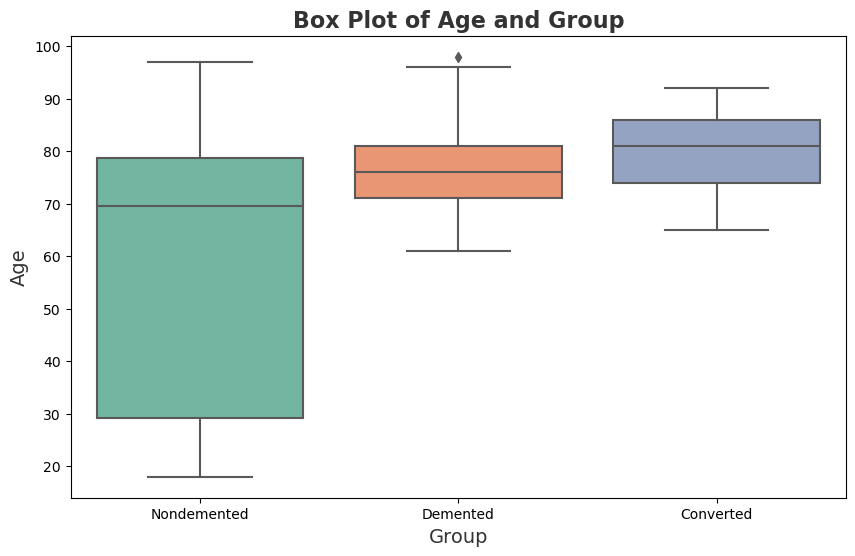

In [22]:
import pandas as pd

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Age', data=data, palette='Set2')
plt.title('Box Plot of Age and Group', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Group', fontsize=14, color='#333333')
plt.ylabel('Age', fontsize=14, color='#333333')
plt.show()

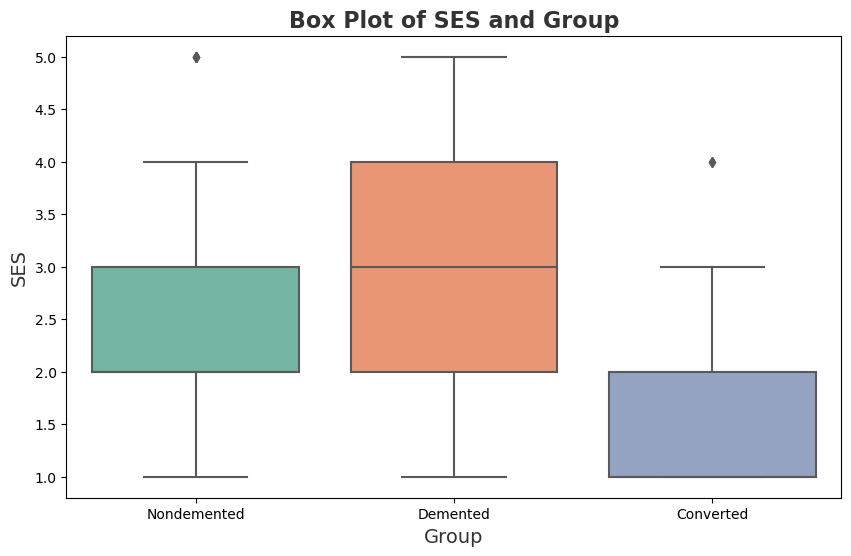

In [23]:
import pandas as pd

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='SES', data=data, palette='Set2')
plt.title('Box Plot of SES and Group', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Group', fontsize=14, color='#333333')
plt.ylabel('SES', fontsize=14, color='#333333')
plt.show()

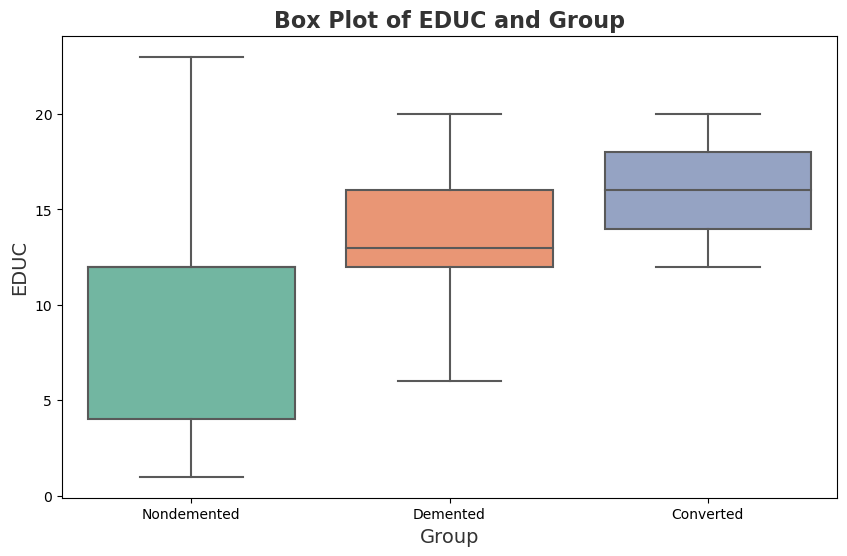

In [24]:
import pandas as pd

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Educ', data=data, palette='Set2')
plt.title('Box Plot of EDUC and Group', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Group', fontsize=14, color='#333333')
plt.ylabel('EDUC', fontsize=14, color='#333333')
plt.show()

<Axes: title={'center': 'Normal Distribution'}, xlabel='SES', ylabel='Density'>

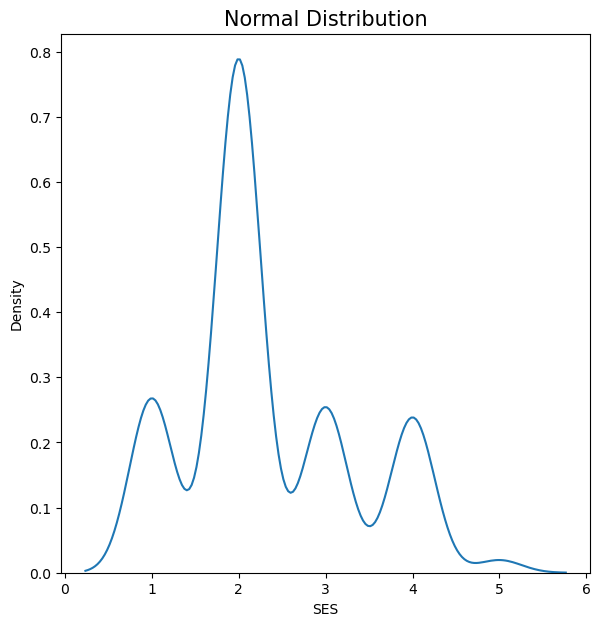

In [25]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Normal Distribution", fontsize=15)
sns.kdeplot(data = data["SES"])

In [26]:
data

ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28  12.0  2.0  30.0  0.0  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18  12.0  2.0  30.0  0.0  1737  0.848  1.010   
..             ...  ..  ...  ...   ...  ...   ...  ...   ...    ...    ...   
368  OAS1_0001_MR1   M    R   82  16.0  1.0  28.0  0.5  1693  0.694  1.037   
369  OAS1_0001_MR1   M    R   86  16.0  1.0  26.0  0.5  1688  0.675  1.040   
370  OAS1_0001_MR1   F    R   61  13.0  2.0  30.0  0.0  1319  0.801  1.331   
371  OAS1_0001_MR1   F    R   63  13.0  2.0  30.0  0.0  1327  0.796  1.323   
372  OAS1_0001_MR1   F    R   65  13.0  2.0  30.0  0.0  1333  0.801  1.317   

     Delay Subject ID         MRI ID        Group  Visit  MR Delay  
0      2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
1      2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
2      2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
3      2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
4      2.0  OAS2_0048  OAS2_0001_MR1  Nondemented    1.0       0.0  
..     ...        ...            ...          ...    ...       ...  
368    2.0  OAS2_0185  OAS2_0185_MR2     Demented    2.0     842.0  
369    2.0  OAS2_0185  OAS2_0185_MR3     Demented    3.0    2297.0  
370    2.0  OAS2_0186  OAS2_0186_MR1  Nondemented    1.0       0.0  
371    2.0  OAS2_0186  OAS2_0186_MR2  Nondemented    2.0     763.0  
372    2.0  OAS2_0186  OAS2_0186_MR3  Nondemented    3.0    1608.0  

[809 rows x 17 columns]

In [27]:
data.dtypes

ID             object
M/F            object
Hand           object
Age             int64
Educ          float64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
Delay         float64
Subject ID     object
MRI ID         object
Group          object
Visit         float64
MR Delay      float64
dtype: object

In [28]:
data.columns


Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Delay', 'Subject ID', 'MRI ID', 'Group', 'Visit',
       'MR Delay'],
      dtype='object')

In [29]:
X = data.drop(['Group', 'ID', 'Delay', 'Subject ID', 'MRI ID', 'Visit', 'MR Delay'], axis=1)
y = data['Group']

In [30]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [31]:
scale = ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV','nWBV', 'ASF']
ohe = ['M/F', 'Hand']

In [32]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(), ohe)
    ])

In [34]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [35]:
label = LabelEncoder()
y_train_label = label.fit_transform(y_train)
y_test_label = label.transform(y_val)

In [36]:
pipeline.fit(X_train, y_train_label)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['Age', 'Educ', 'SES', 'MMSE',
                                                   'CDR', 'eTIV', 'nWBV',
                                                   'ASF']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['M/F', 'Hand'])])),
                ('classifier', RandomForestClassifier())])

In [37]:
accuracy = pipeline.score(X_val, y_test_label)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9629629629629629


In [38]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, n_jobs=-1))  
])


pipeline.fit(X_train, y_train_label)

accuracy = pipeline.score(X_val, y_test_label)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9629629629629629


In [39]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Group'])


X1 = data.drop(['Group', 'ID', 'Delay', 'Subject ID', 'MRI ID', 'Visit', 'MR Delay'], axis=1)
y1 = y_encoded

X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [40]:
scale = ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV','nWBV', 'ASF']
ohe = ['M/F', 'Hand']

In [41]:
preprocessor1 = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(), ohe)
    ])

xgb_0 = XGBClassifier(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=10,
    min_child_weight=2,
    gamma=1,
    colsample_bytree=0.8,
    subsample=0.8,
    objective='binary:logistic',
    nthread=-2,
    random_state=42
)

pipeline1 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_0)  
])

In [42]:
pipeline1.fit(X_train, y_train)

accuracy = pipeline.score(X_val, y_val)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9629629629629629


In [43]:
pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())  
])

pipeline2.fit(X_train, y_train)

accuracy = pipeline.score(X_val, y_val)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9629629629629629


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr, kendalltau

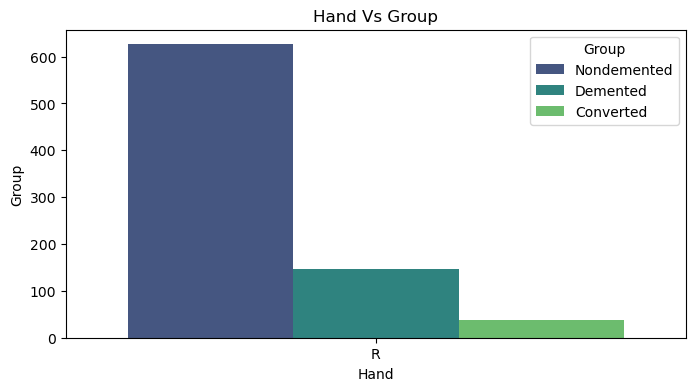

In [45]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Hand', hue='Group', palette='viridis')

plt.title('Hand Vs Group')
plt.xlabel('Hand')
plt.ylabel('Group')
plt.show()

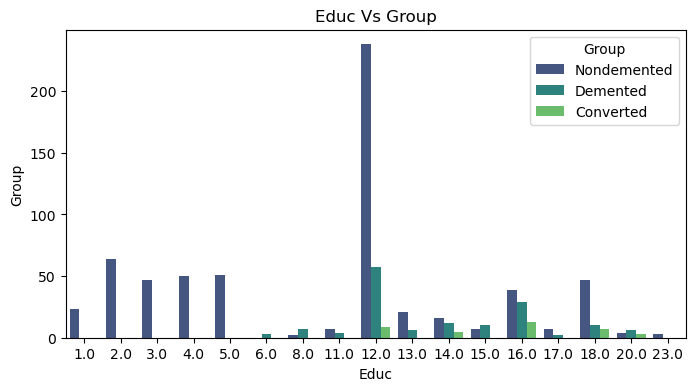

In [46]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Educ', hue='Group', palette='viridis')

plt.title('Educ Vs Group')
plt.xlabel('Educ')
plt.ylabel('Group')
plt.show()

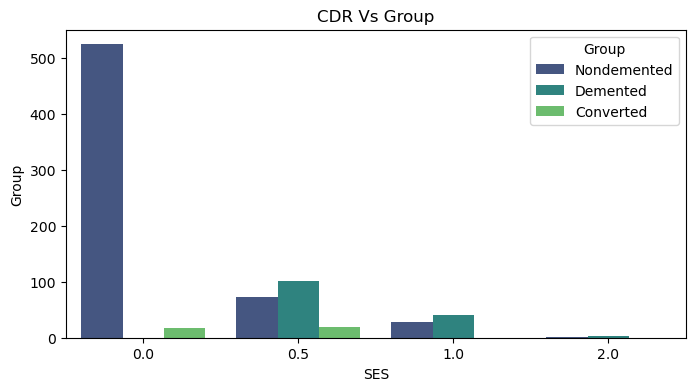

In [47]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='CDR', hue='Group', palette='viridis')

plt.title('CDR Vs Group')
plt.xlabel('SES')
plt.ylabel('Group')
plt.show()

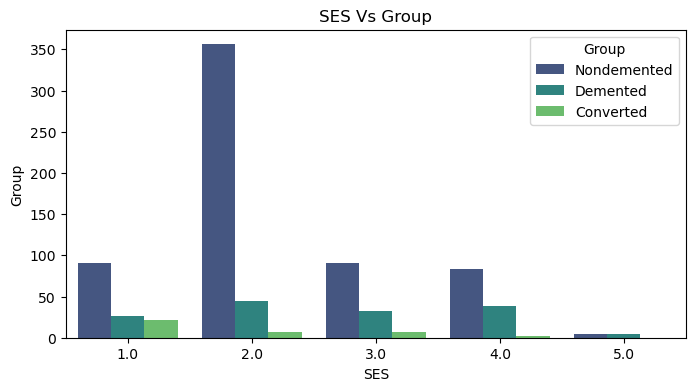

In [48]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='SES', hue='Group', palette='viridis')

plt.title('SES Vs Group')
plt.xlabel('SES')
plt.ylabel('Group')
plt.show()

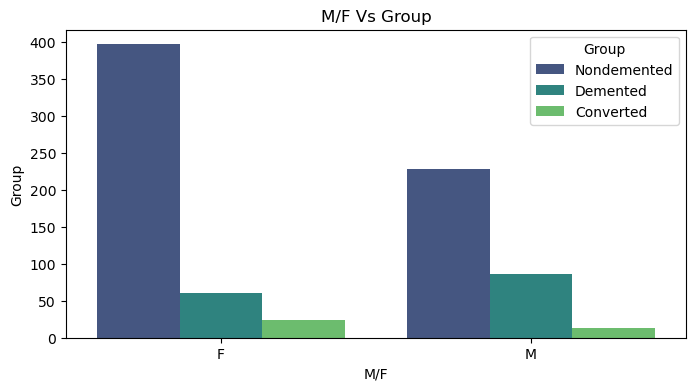

In [49]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='M/F', hue='Group', palette='viridis')

plt.title('M/F Vs Group')
plt.xlabel('M/F')
plt.ylabel('Group')
plt.show()

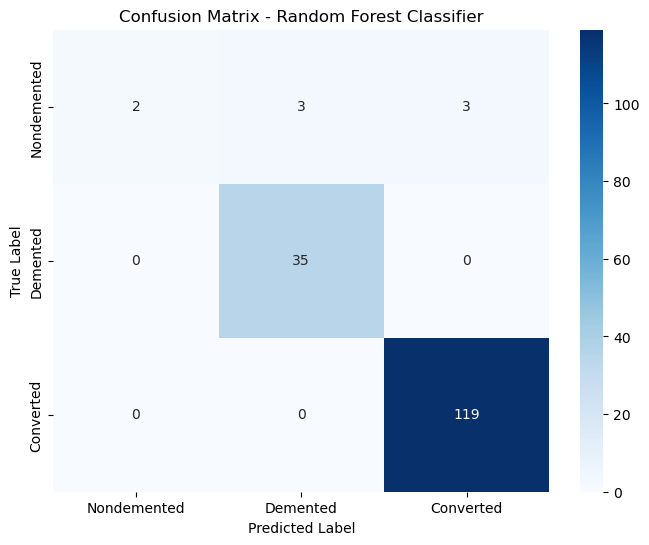

In [50]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test_label, pipeline.predict(X_val))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented', 'Converted'], yticklabels=['Nondemented', 'Demented', 'Converted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix - XGBoost Classifier')

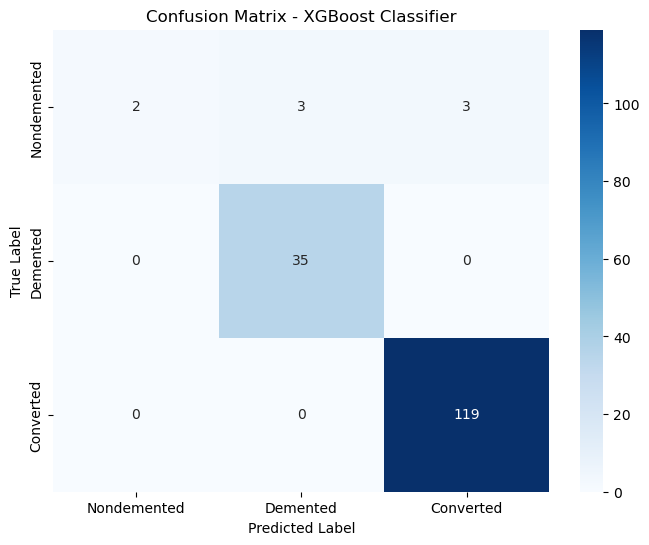

In [51]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_val, pipeline.predict(X_val))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented', 'Converted'], yticklabels=['Nondemented', 'Demented', 'Converted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost Classifier')

In [52]:
from sklearn.metrics import classification_report

print("Classification Report - Random Forest Classifier:")
print(classification_report(y_test_label, pipeline.predict(X_val)))

Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.92      1.00      0.96        35
           2       0.98      1.00      0.99       119

    accuracy                           0.96       162
   macro avg       0.97      0.75      0.78       162
weighted avg       0.96      0.96      0.95       162



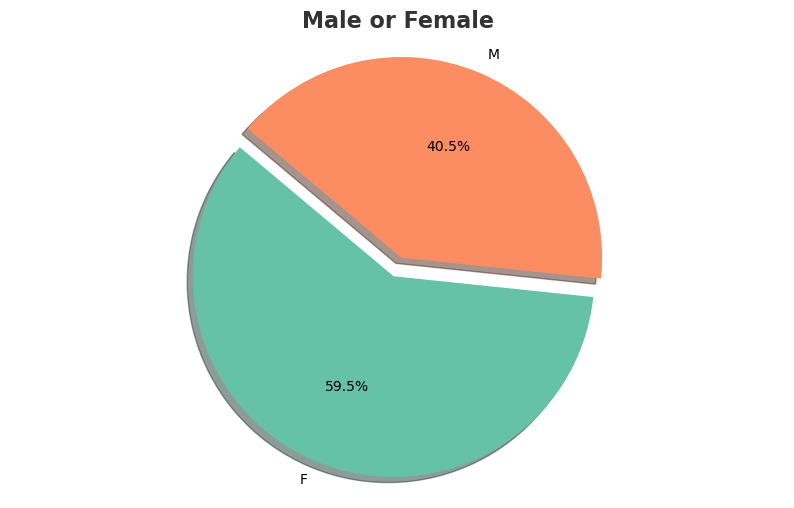

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

potability_counts = data['M/F'].value_counts()

colors = ['#66c2a5', '#fc8d62']
explode = (0.1, 0)  

plt.figure(figsize=(10, 6))
plt.pie(potability_counts, labels=potability_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Male or Female', fontsize=16, fontweight='bold', color='#333333')
plt.axis('equal')  
plt.show()

In [54]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
fig = px.scatter(data, x="MMSE", y="Educ", color="Group")
fig.show()

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer




In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(), ohe)
    ])

In [59]:
pipelines = {
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(probability=True, random_state=42))
    ]),
    'KNN': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),
    'LogisticRegression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(random_state=42))
    ]),
    'GradientBoosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'DecisionTree': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    'CatBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', CatBoostClassifier(random_state=42, verbose=0))
    ])
}

In [60]:
accuracies = {}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train_label)
    accuracy = pipeline.score(X_val, y_test_label)
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

RandomForest Accuracy: 0.9630
SVM Accuracy: 0.9259
KNN Accuracy: 0.9506
LogisticRegression Accuracy: 0.9012
XGBoost Accuracy: 0.9630
GradientBoosting Accuracy: 0.9630
DecisionTree Accuracy: 0.9383
CatBoost Accuracy: 0.9630


In [61]:
svm_clf = SVC(probability=True)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()
xgb_clf = XGBClassifier()
gbm_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
catboost_clf = CatBoostClassifier(random_state=42)

In [62]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('svm', svm_clf),
        ('knn', knn_clf),
        ('lr', lr_clf),
        ('xgb', xgb_clf),
        ('gbm', gbm_clf),
        ('dt', dt_clf),
        ('catboost', catboost_clf)
    ],
    voting='soft'  
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

In [63]:
pipeline.fit(X_train, y_train_label)

accuracy = pipeline.score(X_val, y_test_label)
print(f'Model Accuracy: {accuracy}')

Learning rate set to 0.077389
0:	learn: 0.9914731	total: 7.26ms	remaining: 7.25s
1:	learn: 0.9063640	total: 13.3ms	remaining: 6.62s
2:	learn: 0.8276196	total: 18.6ms	remaining: 6.18s
3:	learn: 0.7606386	total: 25.8ms	remaining: 6.42s
4:	learn: 0.7020445	total: 31.1ms	remaining: 6.18s
5:	learn: 0.6487868	total: 36.6ms	remaining: 6.07s
6:	learn: 0.6077989	total: 43.3ms	remaining: 6.14s
7:	learn: 0.5716511	total: 48.1ms	remaining: 5.96s
8:	learn: 0.5376047	total: 53.7ms	remaining: 5.91s
9:	learn: 0.5059299	total: 58.5ms	remaining: 5.79s
10:	learn: 0.4779844	total: 63.3ms	remaining: 5.69s
11:	learn: 0.4538964	total: 68.6ms	remaining: 5.65s
12:	learn: 0.4302521	total: 75.6ms	remaining: 5.74s
13:	learn: 0.4129904	total: 81.1ms	remaining: 5.71s
14:	learn: 0.3937267	total: 86.9ms	remaining: 5.7s
15:	learn: 0.3766470	total: 90.3ms	remaining: 5.55s
16:	learn: 0.3595019	total: 96ms	remaining: 5.55s
17:	learn: 0.3446241	total: 102ms	remaining: 5.54s
18:	learn: 0.3328664	total: 108ms	remaining: 5.5